#Data 02: Lakers data
로스앤젤레스 레이커스(LA Lakers)는 미국 캘리포니아주 로스앤젤레스를 연고로 하는 NBA 서부 콘퍼런스 퍼시픽 디비전 소속 프로농구 팀으로, NBA 우승 17회를 기록한 명문팀입니다.  
이 데이터는 2008-2009 시즌의 LA 레이커스 경기에 대한 기록입니다.

Data from: http://www.basketballgeek.com/data/  

##1.데이터 둘러보기

In [22]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
lakers = pd.read_csv('Lakers.csv')

In [5]:
#불러온 데이터 일단 보기
lakers.head(5)

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


<컬럼 설명>
* Date: 경기 일자  
* Opponent: 대전 팀  
* Game type: 홈경기 vs. 원정경기  
* Time: 분 : 초  
* Period: 쿼터(한 쿼터당 12분 씩, 동점일 경우 5 쿼터 진행)
* Etype: 유형(ejection / foul / free throw / jump ball / rebound / shot / sub / timeout / turnover / violation
퇴장 / 파울 / 자유투/ 점프볼/ 리바운드/ 슛/ 패스 / 타임아웃/ 턴오버/ 반칙)
* Team: 팀 구분(LAL: LA Lakers, 상대팀)  
* Player: 선수명  
* Result: 결과  
* Points: 점수  
* Type: 세부행동  
* X, Y: 상대편 팀 골대 뒤에서 바라본 X, Y 좌표. 골대의 위치는 (25, 5.25)이다.

In [7]:
#데이터 기본 정보 확인하기
lakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


* 범주형 변수: *빈도frequency 계산 가능*
               opponent, game_type, period, etype, team, player, resuts, type
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               시간 변수(date, time), result, x, y

In [8]:
#연속형(수치) 데이터의 통계치 확인하기
lakers.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [9]:
#범주형 데이터의 통계치 확인하기
lakers.describe(include=np.object)

C:\Users\ParkHanna\AppData\Local\Temp\ipykernel_28188\2502921998.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lakers.describe(include=np.object)


,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [10]:
#변수형 컬럼 안에는 어떤 내용이 들어있을까?
print('Oppenent: ', lakers['opponent'].unique())
print('Game type: ', lakers['game_type'].unique())
print('Period: ', lakers['period'].unique())
print('Etype: ', lakers['etype'].unique())
print('Team: ', lakers['team'].unique())
print('Result: ', lakers['result'].unique())
print('Points: ', lakers['points'].unique())
print('Type: ', lakers['type'].unique())

Oppenent:  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game type:  ['home' 'away']
Period:  [1 2 3 4 5]
Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team:  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Result:  [nan 'missed' 'made']
Points:  [0 2 1 3]
Type:  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fa

In [11]:
#데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", lakers.shape[0]*lakers.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(lakers.isnull().sum().sum(), (lakers.isnull().sum().sum()*100)/(lakers.shape[0]*lakers.shape[1])))
print("LA 레이커스와 경기한 팀 수: ", lakers['opponent'].nunique()-1)
print("경기에 등장하는 행동 수: ", lakers['etype'].nunique())
print("경기에 등장하는 세부행동 수: ", lakers['type'].nunique())

총 데이터 개수:  450112
총 결측치 수: 76625 = 전체 데이터의 17.02% 
LA 레이커스와 경기한 팀 수:  28
경기에 등장하는 행동 수:  10
경기에 등장하는 세부행동 수:  73


##2.데이터에서 질문 만들기

* LA레이커스의 홈 경기 vs. 원정경기 비율은?
* 경기에서 선수들이 가장 많이 하는 행동유형(etype)은?
* 이번 시즌에서 LA레이커스의 경기 결과는?
* LA레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 했는가?

##3.데이터 정비하기

###3-1. 시간 타입의 컬럼 정비하기

In [12]:
#date 컬럼은 int64, time 컬럼은 object 타입이므로 date 컬럼의 타입을 변환한 후 두 컬럼을 합친다
lakers['date'] = lakers['date'].apply(str)
lakers['datetime'] = lakers['date'] + ' ' + lakers['time']
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [13]:
#date 컬럼과 새로 만든 datetime 컬럼을 날짜 타입으로 바꿔준다
#날짜 타입은 연, 월, 일, 시, 분, 초 등의 정보를 보기 편하다(시계열 분석시 편리!)
lakers['datetime'] = pd.to_datetime(lakers['datetime'],format='%Y%m%d %H:%M:%S')
lakers['date'] = pd.to_datetime(lakers['date'],format='%Y%m%d')
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


###3-2. 결측치 처리하기

In [14]:
#NULL이 존재하는 컬럼 확인하기 
lakers.isnull().any(axis=0)
#player, result, type, x, y 컬럼에 NaN 존재한다

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

In [15]:
#컬럼의 특성마다 어떻게 null을 처리해줄 것인가?
#player, result, type은 object 값이 들어가 있으므로 굳이 NaN에 값을 채울 필요 없다
#x, y 컬럼의 NaN: 그냥 둬도되지만 0을 채워 넣어보자
#0을 채워 넣기 전에, 실제 데이터에 0이 존재하는지 확인!
print(lakers.index[lakers['x'] == '0'].tolist())
print(lakers.index[lakers['y'] == '0'].tolist())
#존재하지 않는다!

[]
[]


In [16]:
#x, y 포지션의 NaN에 0 채워넣기
lakers['x'].fillna(0, inplace=True)
lakers['y'].fillna(0, inplace=True)
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00


##4.EDA & Visualizaion

###4-1. 홈 경기 대 원정 경기의 비율

In [18]:
#날짜별로 홈 경기인지 원정경기인지 보려면?
lakers[['date','game_type']].groupby(['date','game_type']).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [17]:
#reset_index 함수로 정리해주기
lakers[['date','game_type']].groupby(['date','game_type']).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [20]:
#홈 경기 대 원정 경기의 비율: 
#날짜별로 home/away 데이터가 중복되므로 처음 하나만 남기고 날려버려서 해결하는 방법도 있다
df1 = lakers.drop_duplicates(['date'], keep='first')
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,2009-04-12 12:00:00


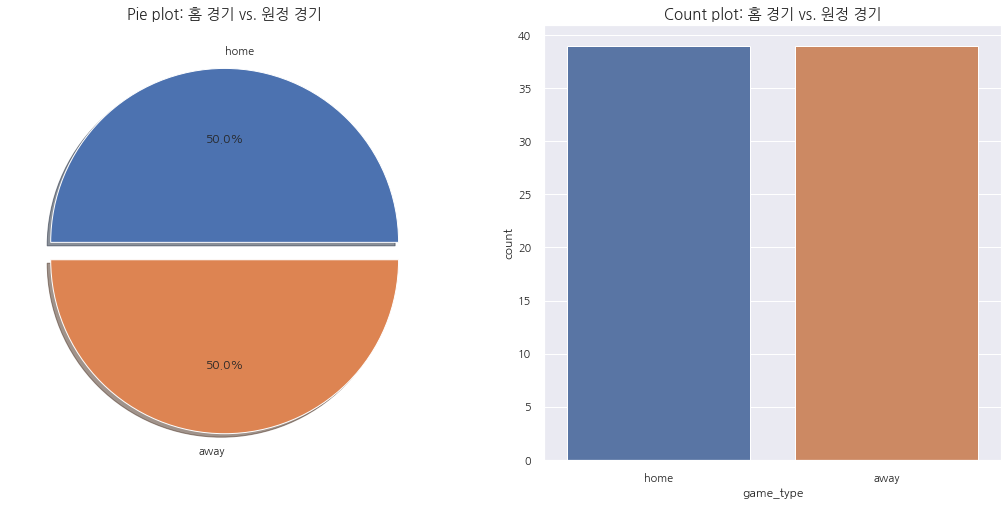

In [24]:
#홈 경기 대 원정 경기의 비율: 그래프로 나타내기
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
df1['game_type'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot: 홈 경기 vs. 원정 경기', size = 15)
ax[0].set_ylabel('') #y 라벨 없애기

#count plot
sns.countplot('game_type', data=df1, ax=ax[1])
ax[1].set_title('Count plot: 홈 경기 vs. 원정 경기', size = 15)

plt.show()

###4-2.경기에서 발생한 행동 유형 확인하기

In [25]:
#몇개의 행동 유형이 있는가?
print('Etype: ', lakers['etype'].unique())

Etype:  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [26]:
#모든 경기를 포함해서 각각의 행동유형이 몇번 발생했는지 세기
lakers['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

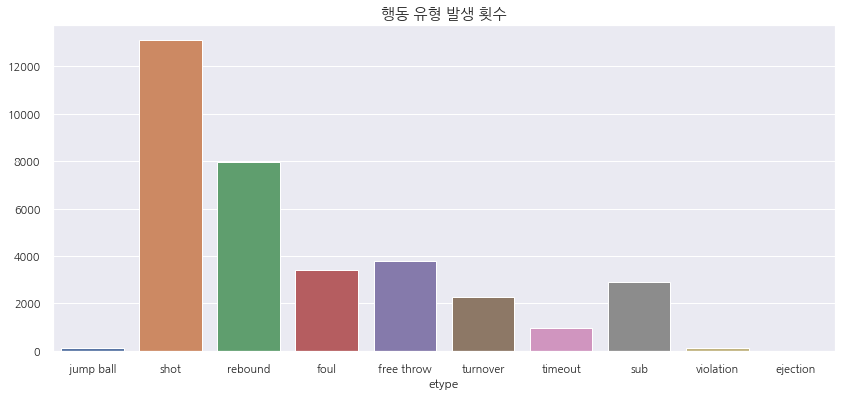

In [27]:
#행동유형 발생 횟수 그래프로 나타내기
f, ax = plt.subplots(1, 1, figsize=(14, 6))

sns.countplot(x=lakers['etype'], ax=ax)
ax.set_title('행동 유형 발생 횟수', size=15)
ax.set_ylabel('')

plt.show()

In [28]:
#특정 쿼터에서 많이 발생한 행동이 있을까?
#groupby를 사용해서 각 쿼터별로 각각의 행동이 몇 회 발생했는지 세 보기
df2 = lakers.groupby(['etype','period']).size().reset_index().pivot(columns='period',index='etype', values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


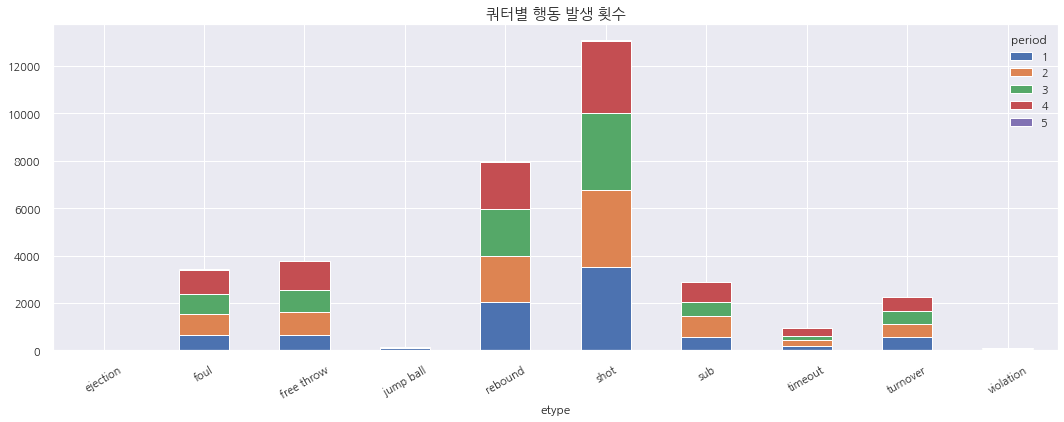

In [29]:
#stack plot 그리기
#어떤 컬럼을 stack 할 것인가? >> 행동유형은 종류가 많다. 쿼터 별로 나누자!
df2.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('쿼터별 행동 발생 횟수', size=15)
plt.xticks(rotation=30)

plt.show()

###4-3. 경기 결과 집계하고 시계열 그래프로 그리기

In [31]:
#날짜별 경기 결과를 group by로 계산해보자
#결과 컬럼에서 성공했을때의 득점만 더하면 경기의 총 점수가 나온다
made = lakers['result'].isin(['made'])
lakers[made].head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [32]:
#날짜별 팀별 슛 성공 건수를 집계해보면?
df3 = lakers[made][['date', 'team', 'points']].groupby(['date', 'team'], as_index=True).sum()
df3

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [33]:
#reset index 사용
df3.reset_index(inplace=True)
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [34]:
#LA 레이커스와 상대편으로 경기 결과 나누기
lal = df3[df3['team'] == 'LAL']
opp = df3[df3['team'] != 'LAL']

In [35]:
lal

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [36]:
#경기 결과를 가로 방향으로 붙이기
#pd.merge 함수 사용: 붙일 때 key는? = 날짜!
df4 = pd.merge(lal, opp, on='date')
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [38]:
#La레이커스가 이긴 날과 진 날을 고르자
win = df4[df4['points_x'] > df4['points_y']]
los = df4[df4['points_x'] < df4['points_y']]
   
print("08 - 09 시즌에 LA 레이커스는 총 {}회의 경기 중, {}번 우승했다".format(df4.shape[0], df4[df4['points_x'] > df4['points_y']].shape[0] ))                         

08 - 09 시즌에 LA 레이커스는 총 78회의 경기 중, 63번 우승했다


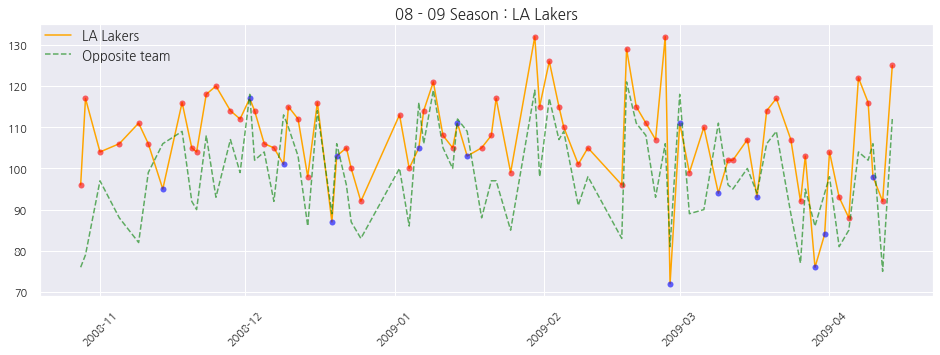

In [44]:
#경기 결과를 시계열 그래프로 확인하기
plt.figure(figsize=(16,5))

plt.title("08 - 09 Season : LA Lakers", fontsize=15)

#LA 레이커스 점수를 오렌지 실선으로 나타낸다
plt.plot(lal['date'], lal['points'], "-", alpha= 1, color = 'orange', label='LA Lakers')

#LA 레이커스가 이긴 날은 빨간 점, 진 날은 파란 점으로 표시해주자
plt.plot(win['date'], win["points_x"], 'o', alpha=.6, color = 'red')
plt.plot(los['date'], los["points_x"], 'o', alpha=.6, color = 'blue')

#상대팀 점수를 초록색 점선으로 나타낸다
plt.plot(opp['date'], opp["points"], "--", alpha=.6, color = 'green', label='Opposite team')

plt.legend(loc='upper left', borderaxespad=0, fontsize=13)
plt.xticks(rotation=45)

plt.show()

###4-4. LA레이커스 팀의 코트 위치별 행동

In [46]:
#LA lakers의 데이터만 가져오기: Team = LAL 인 것
lal2 = lakers[lakers['team'] == 'LAL']
lal2

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,0.0,0.0,2009-04-14 00:27:00


C:\Users\ParkHanna\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


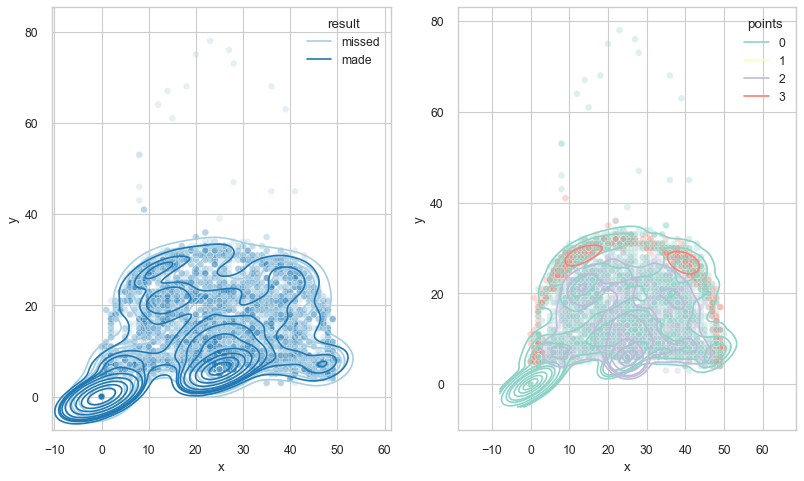

In [50]:
#슛한 위치 확인하기
#득점은 어느 위치에서 발생했는가?
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 2, figsize=(12, 7), dpi = 80)

#득점 성공/실패 분포
g1 = sns.scatterplot(data=lal2, x='x', y='y', hue='result', alpha = 0.3, palette='Paired', ax=ax[0])
g2 = sns.kdeplot(data=lal2, x='x', y='y', hue='result', palette='Paired', ax=ax[0])

#득점 점수 별 분포
g3 = sns.scatterplot(data=lal2, x='x', y='y', hue='points', alpha = 0.3, palette='Set3', ax=ax[1])
g4 = sns.kdeplot(data=lal2, x='x', y='y', hue='points', palette='Set3', ax=ax[1])

plt.show()
#x, y의 NaN을 0으로 처리해줬기 때문에 0 근처에 쏠림이 생겼다

In [ ]:
#세부 행동 별 슛 위치는 어떻게 될까?
#가장 많이 한 세부 행동 10개 고르기
lal3 = lal2[lal2['type'].__(lal2['type']._________().____(10)._____)]
lal3

In [ ]:
#세부 행동 별 위치 확인하기
sns.set_style('whitegrid')
f, ax = plt.subplots(1, 1, figsize=(5, 7), dpi = 80)

sns._____________(data=lal3, x='_', y='_', hue=lal3['____'], palette='Set3', ax=ax)

#Legend가 10개이기 때문에 그래프 안에 넣으면 혼란스럽다. 옆으로 빼 주자!
ax.______(title='Type', _________________= (1.03, 1))

plt.show()

##5.Review

* LA레이커스 데이터는:  
총 데이터 개수:  450112
총 결측치 수: 76625 = 전체 데이터의 17.02% 
LA레이커스와 경기한 팀 수:  28
경기에 등장하는 행동 수:  10
경기에 등장하는 세부행동 수:  73

* LA레이커스의 홈 경기 vs. 원정경기 비율은?  
  : 홈 경기와 원정경기를 1:1 비율로 치렀다.
* 경기에서 선수들이 가장 많이 하는 행동유형(etype)은?
  : 슛을 가장 많이 하고 그 다음으로는 리바운드.
* 이번 시즌에서 LA레이커스의 경기 결과는?  
  : 08 - 09 시즌에 LA 레이커스는 총 78회의 경기 중, 63번 우승했다.
* LA레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 했는가?
  : 상대편 골대 기준으로 왼쪽에서 슛 했을 때 더 많이 성공했다

* 더 분석해볼 점은?  
  : x, y 좌표의 NaN에 0을 넣지 않는 것이 분석 결과에 더 좋다!  
  : 특정 선수의 행동 패턴 분석
